## Project Name - **Medical Cost Personal Insurance**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**

**The 'Medical Cost Personal Insurance' project aims to develop machine learning algorithms to develop a predictive model that estimates individual medical costs for health insurance. This project is based on a dataset that includes various features such as age, gender, BMI, number of children, smoking status, region, and actual medical costs. The objective is to build a machine learning model that can accurately predict medical expenses, which will helpful for both insurance providers and policyholders to make more informed decisions and better manage healthcare costs.**

We have below variable in given dataset,

1.   **Age** : Age of Insured.
2.   **Sex** : Insured Gender (Male or Female).
3.   **BMI** : Body Mass Index (A person's weight in Kgs/ Squar of height in meters).
4.   **Children** : Number of children per Insured/ Dependent count.(0 to 5)
5.   **Smoker** : Is Insured is smoker or not (Yes or No).
6.  **Region** : The Insured residential area in the US, northeast, southeast, southwest, northwest.
7.   **Charges** : Individual medical costs billed by health insurance.

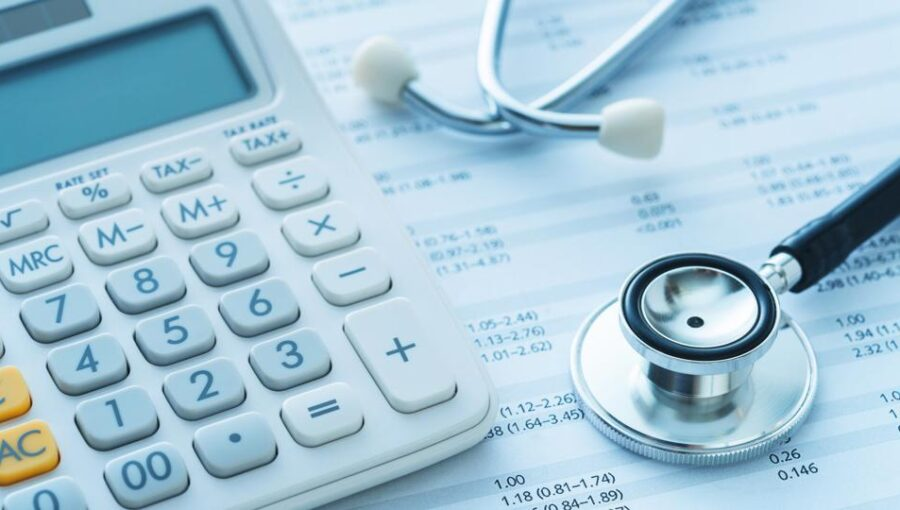




# **Problem Statement**

To develop a predictive machine learning model which accurately predict individual medical costs for personal insurance, considering variables like age, gender, BMI, number of children, smoking status, and region.

*   Which feature are mostly affteting for insurance charges.
*   Which feature conrribution more or less for insurance charges.
*   Built ML Model that predict insurane charges, from given or selected varibale.

In [ ]:
medical_data['children'].unique()

array([0, 1, 3, 2, 5, 4])

## Knowing data and variable in dataset

In [ ]:
# Importing Necessary Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [ ]:
# Dataset loading

medical_data = pd.read_csv('/content/drive/MyDrive/DataSets/medical_cost_insurance.csv')

In [ ]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_data.shape

(1338, 7)

There were 1338 records and 07 attributes in the dataset

**Dataset Information**

In [ ]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From .info() w can obcerve that we have varibales with int, object and float data type. sex, smoker and region is categorical , while others are continous variables.

In [ ]:
# Will check for description of dataset

medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From .describe we can observe that we have description for all continous numerical variables.
1. The mean age in the dataset is 39 years, with the maximum age being 65 years and the minimum age being 18 years.
2. The mean BMI in the dataset is 30.66 kg/m², with the maximum BMI at 53.13 kg/m² and the minimum BMI at 6.09 kg/m².
3. On average, each insured individual has one child, while there are insured individuals with a maximum of 5 children and a minimum of 1 child.
4. The mean charges incurred by the insurance company are Rs. 13,270, with the maximum charge being Rs. 63,770 and the minimum charge being Rs. 13,270.


In [ ]:
# we have some categorical veriable, will check for unique values for each

medical_data['sex'].unique()

medical_data['smoker'].unique()

medical_data['region'].unique()


# Actully, childern also seems to be categorical but considerd as continous as we have total 6 unique for childers variable.

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

We have data for two genders: 'Male' and 'Female.' We categorize individuals as either 'smokers' with values 'yes' or 'no.' Also, we have data from four different regions: 'southwest,' 'southeast,' 'northwest,' and 'northeast.

**Will Check for Null value in dataset**

In [ ]:
medical_data.shape

(1338, 7)

In [ ]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
duplicate_entries = medical_data[medical_data.duplicated()]

print(duplicate_entries)

# we have only one entri with duplicte, will drop from dataset.

medical_data.drop_duplicates(inplace=True)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


<Axes: >

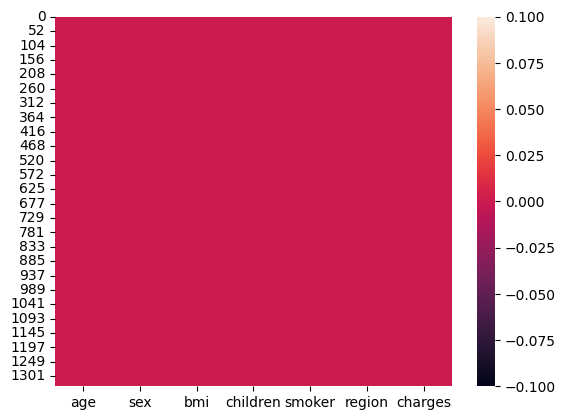

In [ ]:
sns.heatmap(medical_data.isnull())   # No Null value on dataset.

**For the sake of simplicity and to enhance understanding of the dataset, we will create a new column named 'Age_group' with the following categories: For  aged 18 to 30 will be categorized as teenagers, those aged 30 to 50 as adults, and those above 50 as senior citizens.**

In [ ]:
Agegroup = []

categories = ['Teenager', 'Adult', 'Senior Citizen']

for age in medical_data['age']:
  if 18 < age <= 30:
    Agegroup.append(categories[0])
  elif 30 < age <= 50:
    Agegroup.append(categories[1])
  else:
    Agegroup.append(categories[2])

medical_data['Age_group'] = Agegroup

print(medical_data.head())

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

        Age_group  
0        Teenager  
1  Senior Citizen  
2        Teenager  
3           Adult  
4           Adult  


In [ ]:
medical_data['Age_group'].unique()

array(['Teenager', 'Senior Citizen', 'Adult'], dtype=object)

#### Chart - 1

### **Age_Group wise count of insured**

Adult             538
Senior Citizen    425
Teenager          374
Name: Age_group, dtype: int64


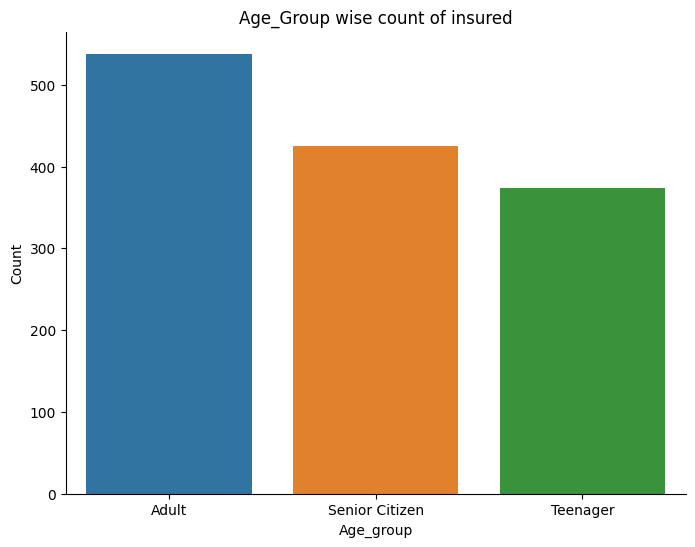

In [ ]:
age_group_count = medical_data['Age_group'].value_counts()

print(age_group_count)

f,ax = plt.subplots(figsize = (8,6))
sns.despine(f)
sns.barplot(x=age_group_count.index,y=age_group_count.values,data =medical_data)
plt.xlabel('Age_group')
plt.ylabel('Count')
plt.title('Age_Group wise count of insured')

plt.show()

### **Insights:**
The graph provides a clear and visual representation of how the insured population is distributed across different age groups.
*   Above graph indicates that 'Adult' age group is having maximum count follwed by 'Seniou Citizen' and Teenager.
*   Insured with age 30 to 50 years are maximum.

In [ ]:
medical_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age_group'],
      dtype='object')

#### Chart - 2

### **Sex wise childern count**

children    0    1    2   3   4   5
sex                                
female    289  158  119  77  11   8
male      284  166  121  80  14  10


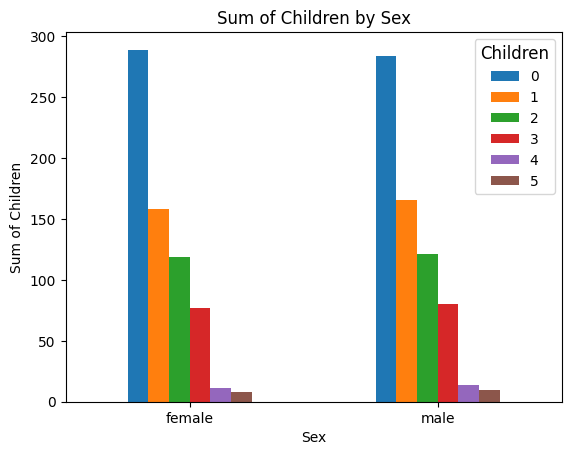

In [ ]:
Sex_wise_childern_count = pd.crosstab(index=medical_data['sex'], columns=medical_data['children'])

print(Sex_wise_childern_count)

Sex_wise_childern_count.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Sum of Children')
plt.title('Sum of Children by Sex')
plt.xticks(rotation=0)
plt.legend(title='Children', title_fontsize='12')
plt.show()

### **Insights:**
The graph is a useful visualization for understanding the distribution of the number of children in the dataset based on gender.

*   The "female" category typically has a higher count of children compared to the "male" category
*   This graph indicate how many families have no children, how many have one child, and how many have larger families with multiple children.




#### Chart - 3

### **Sex wise smoker count**

smoker   no  yes
sex             
female  547  115
male    516  159


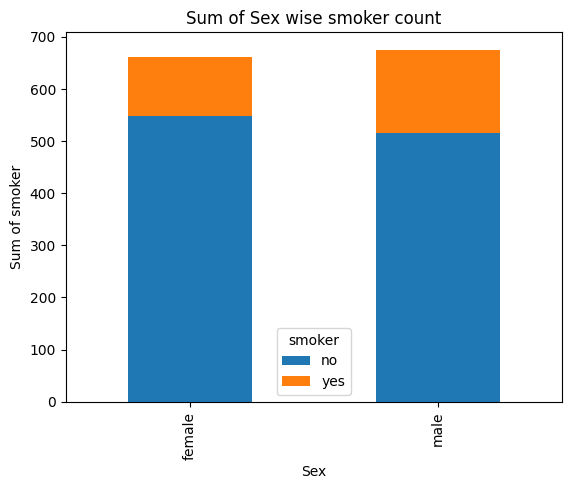

In [ ]:
Sex_wise_smoker_count = pd.crosstab(index=medical_data['sex'], columns=medical_data['smoker'])

print(Sex_wise_smoker_count)

Sex_wise_smoker_count.plot(kind='bar',stacked=True)
plt.xlabel('Sex')
plt.ylabel('Sum of smoker')
plt.title('Sum of Sex wise smoker count')
plt.legend(title='smoker')
plt.show()

### **Insights:**
The graph effectively summarizes and visualizes the distribution of smokers and non-smokers by gender.
*   The total number of smokers in your dataset by summing up the smoker sections in both the "male" and "female" categories.
*   Above chart indicate that Count of 'female' with 'no' smoker is highest followd by 'male' with 'no' smoker.
*   'Male' smoker are more than 'Female'.

#### Chart - 4

### **Region-wise count**

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


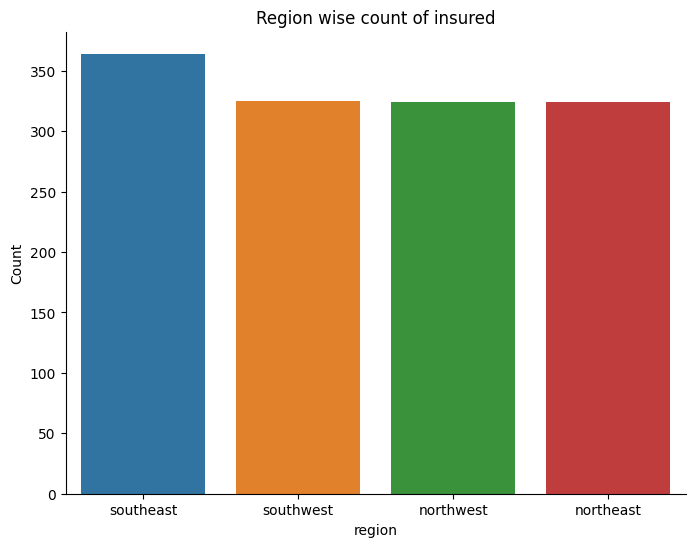

In [ ]:
region_count = medical_data['region'].value_counts()

print(region_count)

f,ax = plt.subplots(figsize = (8,6))
sns.despine(f)
sns.barplot(x=region_count.index,y=region_count.values,data =medical_data)
plt.xlabel('region')
plt.ylabel('Count')
plt.title('Region wise count of insured')

plt.show()

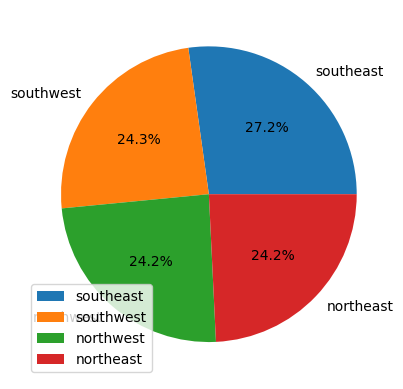

In [ ]:
plt.pie(x=region_count.values, labels=region_count.index, autopct='%1.1f%%')
plt.legend()
ax.legend()
plt.show()

### **Insights:**
The graph provides a clear and visual representation of how the insured population is distributed across Regions.

*   The highest bar is in the 'Southeast' region, and it has 364 (27.2%) insured individuals.
*   The lowest bar is in the 'Northwest' and 'northest' region, and it has 324 (24.2) insured individuals.

In [ ]:
medical_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age_group'],
      dtype='object')

#### Chart - 5

### **Region-wise Sex count**

sex        female  male
region                 
northeast     161   163
northwest     164   160
southeast     175   189
southwest     162   163


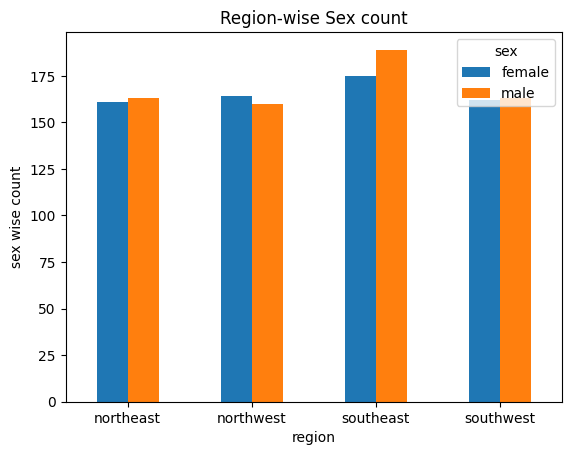

In [ ]:
import pandas as pd

region_wise_sex_count = pd.crosstab(index=medical_data['region'], columns=medical_data['sex'])

print(region_wise_sex_count)

region_wise_sex_count.plot(kind='bar')
plt.xlabel('region')
plt.ylabel('sex wise count')
plt.title('Region-wise Sex count')
plt.xticks(rotation=0)
plt.legend(title='sex',title_fontsize='10')
plt.show()

### **Insights:**
The heights of the bars in the graph, compare them across regions, and calculate the total counts for males and females.

*   In 'southeast' we have maximum count of 'male',while in 'northwest we have minimum count of 'male'.
*   Similarly, 'southeast' we have maximum count of 'female',while in 'northeast we have minimum count of 'female'.

**For the sake of simplicity and to enhance understanding of the dataset, we will create a new column named 'bmi_group' with the following categories: For BMI 18kg/m² or less will be categorized as 'Underweight', those BMI 19kg/m² to 30kg/m² as 'HealthyBMI', and those above 30 as 'Overweight' BMI.**

In [ ]:
BMIgroup = []

categories = ['Underweight', 'HealthyBMI', 'Overweight']

for bmi in medical_data['bmi']:
    if bmi < 18:
        BMIgroup.append(categories[0])
    elif 18 <= bmi <= 30:
        BMIgroup.append(categories[1])
    else:
        BMIgroup.append(categories[2])

medical_data['BMI_group'] = BMIgroup

print(medical_data.head())

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

        Age_group   BMI_group  
0        Teenager  HealthyBMI  
1  Senior Citizen  Overweight  
2        Teenager  Overweight  
3           Adult  HealthyBMI  
4           Adult  HealthyBMI  


#### Chart - 6

### **BMI-group count**

Overweight     704
HealthyBMI     618
Underweight     15
Name: BMI_group, dtype: int64


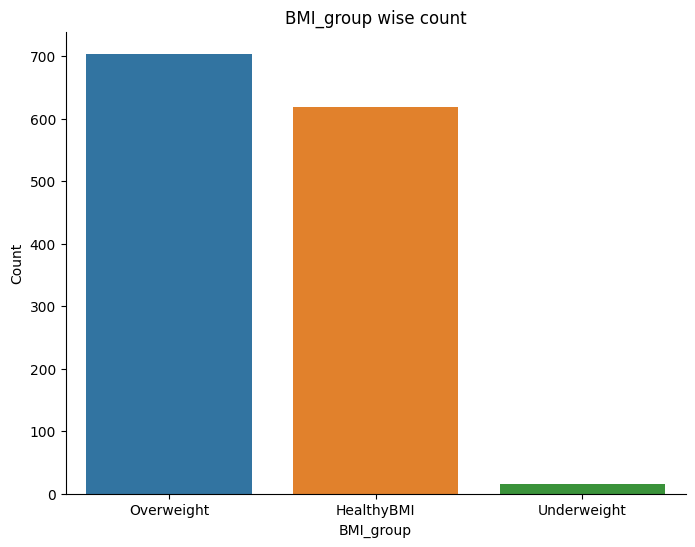

In [ ]:
BMI_count = medical_data['BMI_group'].value_counts()

print(BMI_count)

f,ax = plt.subplots(figsize = (8,6))
sns.despine(f)
sns.barplot(x=BMI_count.index,y=BMI_count.values,data =medical_data)
plt.xlabel('BMI_group')
plt.ylabel('Count')
plt.title('BMI_group wise count')

plt.show()

### **Insights:**
The graph provides a clear and visual representation of how the insured population is distributed across different BMIGroup.


*   We have highest population in 'Overweight' BMI group while lowest population on 'Underwight'.
*   Most of insured population fall under overweight that means insurds BMI is not good, ideally we should have most of count for HealthyBMI.
*   Its good that, not having more count under 'underweight.

#### Chart - 7

### **Average BMI for Age_group**

Age_group
Adult             30.613076
Senior Citizen    31.641871
Teenager          29.624078
Name: bmi, dtype: float64


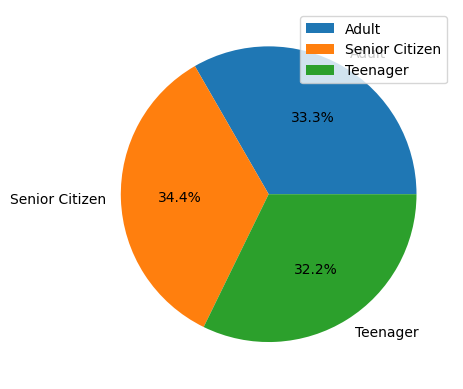

In [ ]:
avg_BMI_sex = medical_data.groupby('Age_group')['bmi'].mean()

print(avg_BMI_sex)

plt.pie(x=avg_BMI_sex.values, labels=avg_BMI_sex.index, autopct='%1.1f%%')
plt.legend()
ax.legend()
plt.show()

smoker        no  yes
BMI_group            
HealthyBMI   492  126
Overweight   560  144
Underweight   11    4


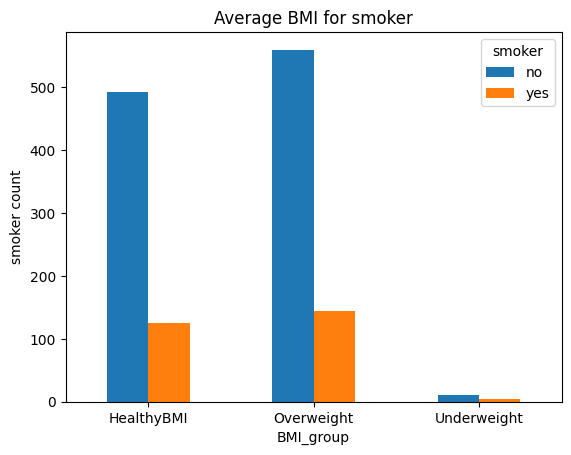

In [ ]:
Average_BMI_for_smoker = pd.crosstab(index=medical_data['BMI_group'], columns=medical_data['smoker'])

print(Average_BMI_for_smoker)

Average_BMI_for_smoker.plot(kind='bar')
plt.xlabel('BMI_group')
plt.ylabel('smoker count')
plt.title('Average BMI for smoker')
plt.xticks(rotation=0)
plt.legend(title='smoker',title_fontsize='10')
plt.show()

### **Insights:**
The graph provides a clear and visual representation of how the smokers count is distributed across different BMIGroup.

*   From graph we can observe that we have maximum count of no smoker in 'overweight' BMI group. While we have maximum count of smoker in 'overweight' BMI group.
*    From graph we can observe that we have very less count for smokers and non-smoker in 'underweight' BMI group.

#### Chart - 8

### **Charges Distribution**

Charges mean : 13279.121486655948


<ipython-input-193-90920088d6c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(medical_data['charges'],bins=10)


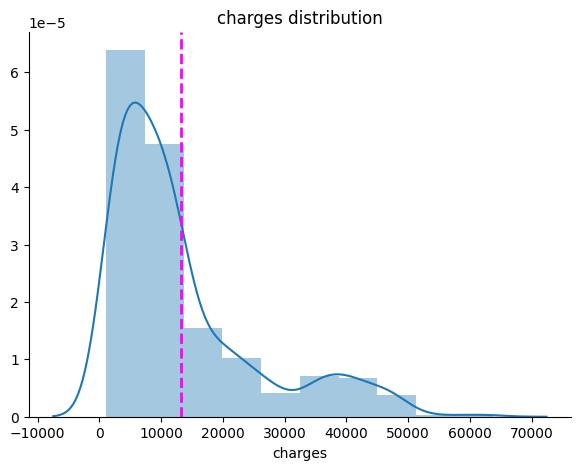

In [ ]:
charges_mean = medical_data['charges'].mean()

print('Charges mean :',charges_mean)

f,ax = plt.subplots(figsize=(7,5))
sns.despine(f)
dist = sns.distplot(medical_data['charges'],bins=10)
dist.set(xlabel = 'charges', ylabel ='', title = 'charges distribution')

dist.axvline(medical_data['charges'].mean(), color='magenta', linestyle='dashed', linewidth=2)

plt.show()

### **Insights:**
The graph provides a clear and visual representation of how the insurece charges is distributed across dataset.
*   From disribuion plot we can observe that, average charges distributed around Rs.13279.
*   The majority of charges appear to be concentrated around the mean value.
*   The distribution seems to be positively skewed, with some charges significantly higher than the mean.

#### Chart - 9

### **Charges distribution for sex and smoker**

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64
sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64


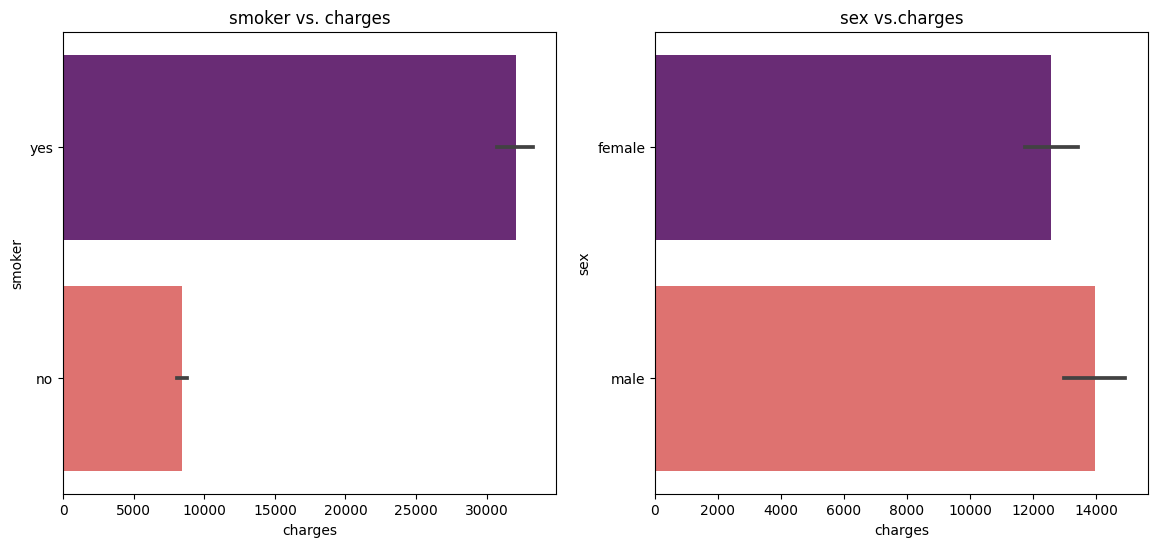

In [ ]:
smoker_charges = medical_data.groupby('smoker')['charges'].mean()

print(smoker_charges)

sex_charges = medical_data.groupby('sex')['charges'].mean()

print(sex_charges)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.barplot(y='smoker', x='charges', ax=axes[0], palette='magma',data=medical_data)
axes[0].set_xlabel('charges')
axes[0].set_ylabel('smoker')
axes[0].set_title('smoker vs. charges')

sns.barplot(x='charges', y='sex', ax=axes[1], palette='magma',data=medical_data)
axes[1].set_xlabel('charges')
axes[1].set_ylabel('sex')
axes[1].set_title('sex vs.charges')

plt.show()

### **Insights:**
The graph provides a clear and visual representation of how the insurece charges is distributed for 'smoker' and 'sex'.
*   Smokers (Yes) have significantly higher average charges for medical insurance compared to non-smokers (No). This suggests that smoking is associated with higher medical costs
*   The plot indicates that, on average, men (Male) tend to have slightly higher medical insurance charges than women (Female).
*   Smoking has a substantial impact on medical insurance charges, with smokers incurring higher costs.
*   Gender also plays a role, with men, on average, having slightly higher charges compared to women.





## **Below tables are for more information from dataset.**

### 1. Average Medical Insurance Charges by Gender and smoker

In [ ]:
sex_smoker_count = pd.crosstab(index=medical_data['smoker'], columns=medical_data['sex'],values = medical_data['charges'],aggfunc='mean')

sex_smoker_count

sex,female,male
smoker,,
no,8762.297300,8099.700161
yes,30678.996276,33042.005975


**From the table above, we can observe that the average charges for female smokers amount to Rs. 30,678, while for males, it is Rs. 33,042. Conversely, for non-smoking females, the average charges are Rs. 8,762, and for non-smoking males, they amount to Rs. 8,099.**

### 2. Average Medical Insurance Charges by Gender and Number of Children

In [ ]:
sex_smoker_count = pd.crosstab(index=medical_data['sex'], columns=medical_data['children'],values = medical_data['charges'],aggfunc='mean')

sex_smoker_count

children,0,1,2,3,4,5
sex,,,,,,
female,11905.714276,12161.360414,13941.317326,13865.605066,13937.674562,9854.006419
male,12872.109178,13273.522458,16187.095325,16789.167419,13782.284829,7931.658310


**The values in the table are the mean charges for medical insurance for each combination of 'sex' and 'children'.**

*   **For both females and males, as the number of children increases, the average charges for medical insurance generally tend to increase. This is expected, as having more children may lead to higher healthcare expenses.**
*   **Overall, males tend to have slightly higher average charges compared to females within each category of children. This suggests that, on average, males have slightly higher medical insurance costs than females.**



### Now will convert object type dtye to int or flote to plot pair plot and heatmap.

In [ ]:
medical_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age_group', 'BMI_group'],
      dtype='object')

In [ ]:
# For sex column we have 2 unique calues, will encode as male = 0, female = 1

sex_encode = {"sex": {"male": 0, "female": 1}}
sex_encode
medical_data = medical_data.replace(sex_encode)

# For smoker column we have 2 unique calues, will encode as no = 0, yes = 1

smoker_encode = {"smoker": {"no": 0, "yes": 1}}
smoker_encode
medical_data = medical_data.replace(smoker_encode)

# For region column we have 4 unique calues, will encode as southwest = 1,southeast=2,northwest=3,northeast=4

region_encode = {"region": {"southwest": 1, "southeast": 2,"northwest":3,"northeast":4}}
region_encode
medical_data = medical_data.replace(region_encode)

In [ ]:
selected_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

new_medical_data = medical_data[selected_columns].copy()

new_medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


#### Chart - 9

### **Pair Plot**

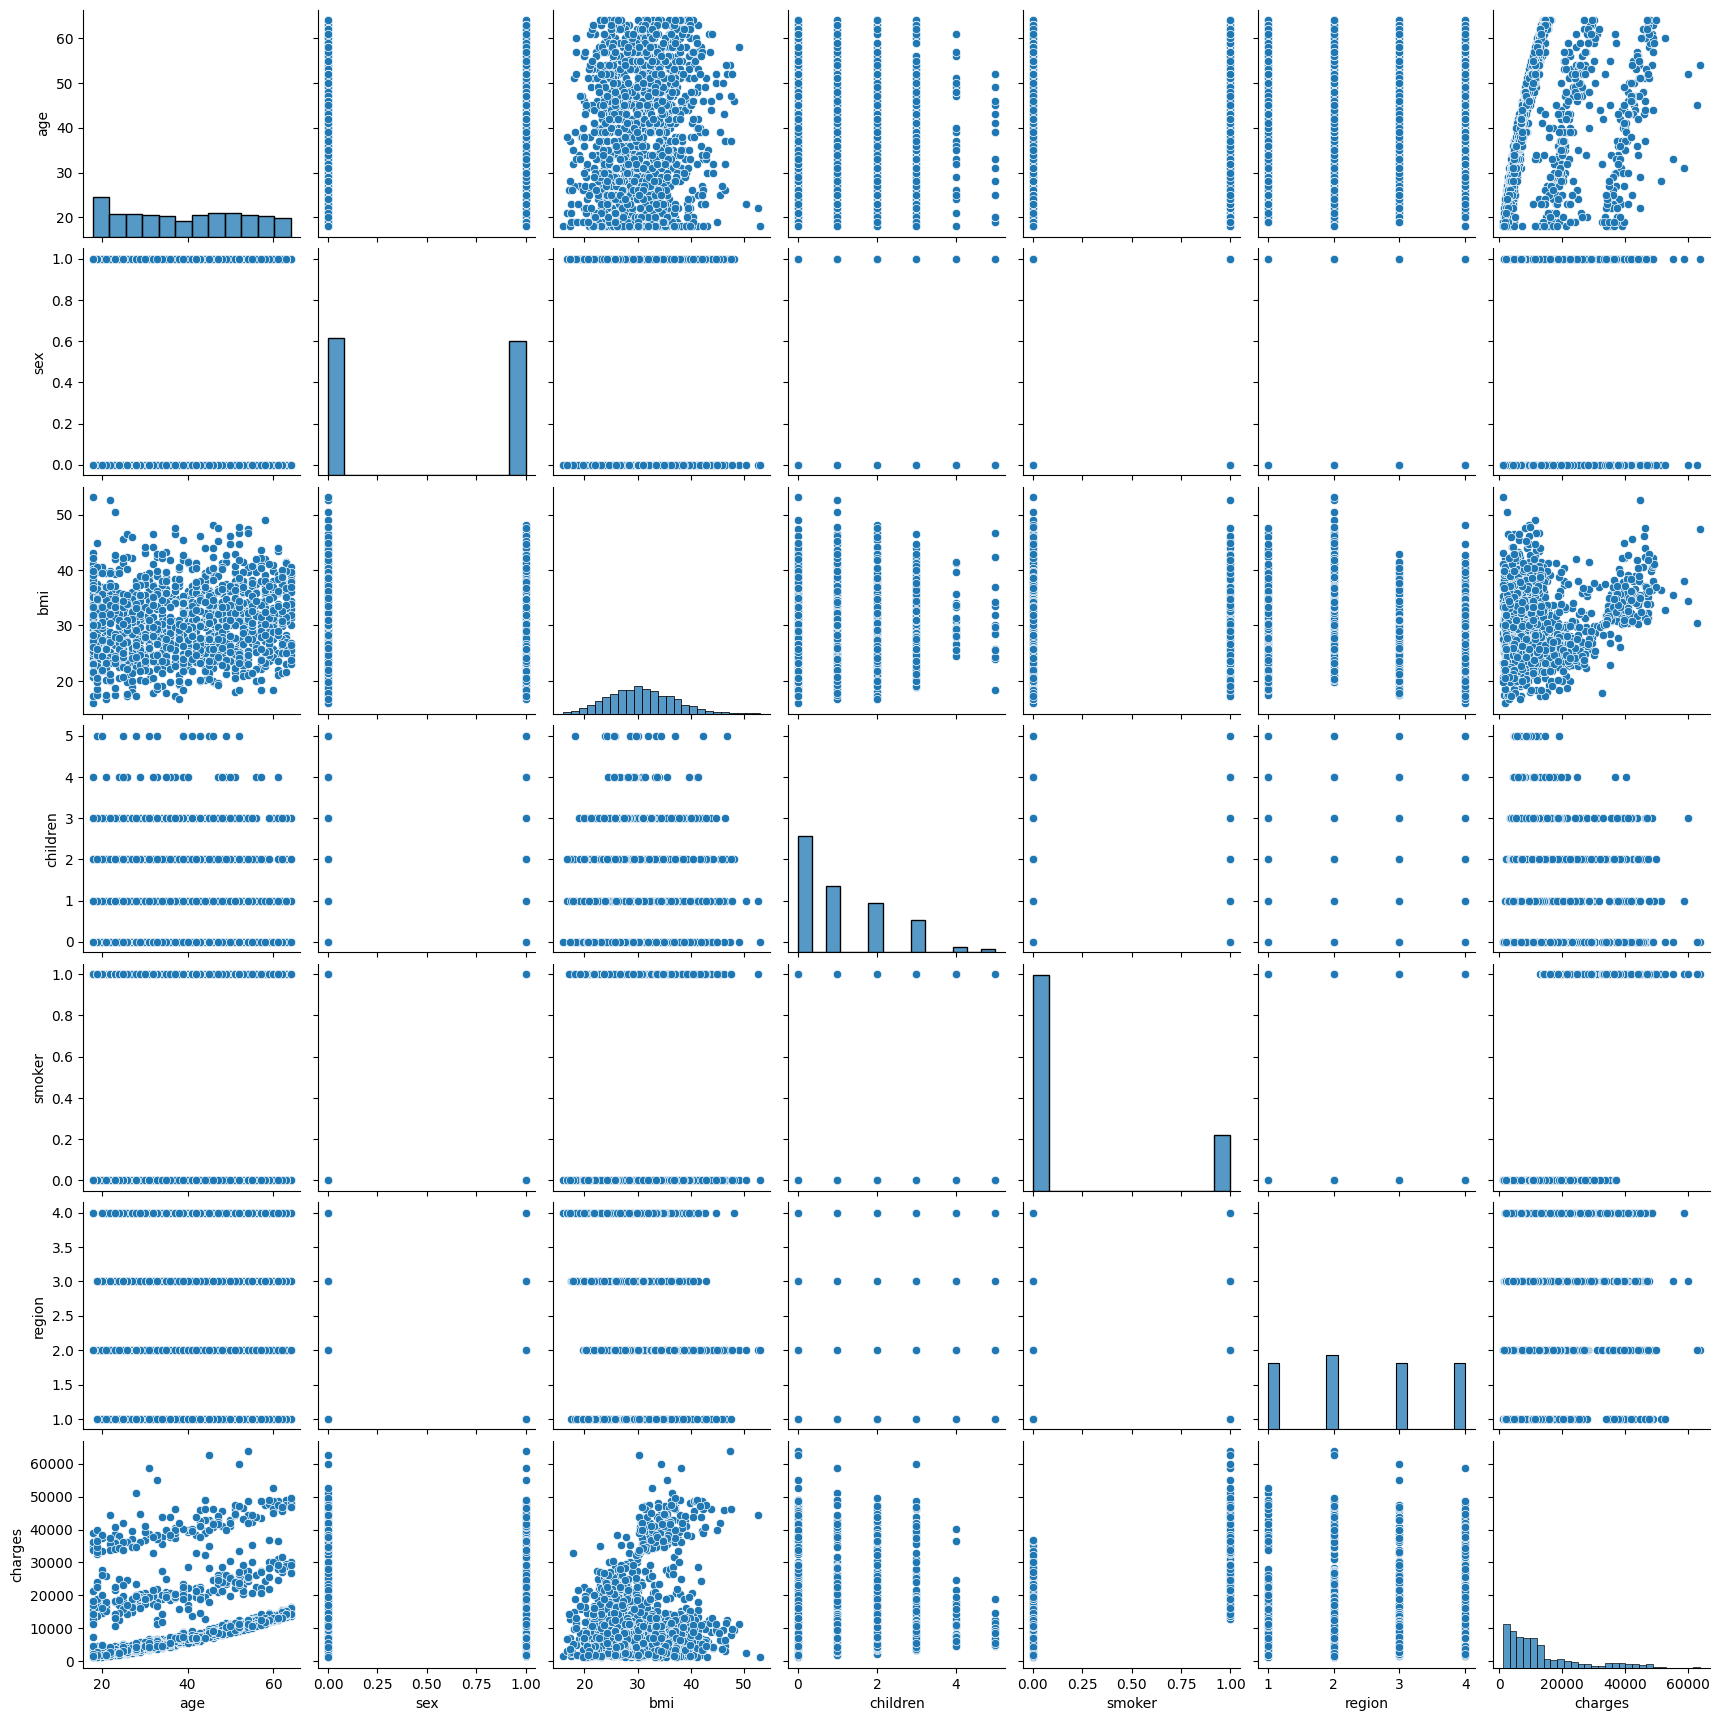

In [ ]:
sns.pairplot(new_medical_data)

plt.show()

### **Insights:**
This type of visualization is useful for understanding the relationships and distributions of variables.

*   We can observe that relation and distribution of each varibale, we have have positive correlation for 'bmi' and 'charges', 'age' and 'charges','children' and 'charges'.



#### Chart - 10

### **Heatmap**

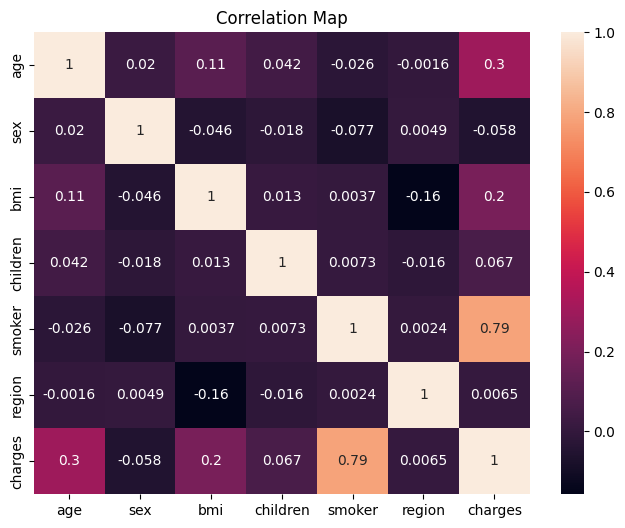

In [ ]:
correlation_data = new_medical_data

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8,6))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

From heatmap we can observe that we have positive correlation between 'smoker' and 'charges' that is 79% and for 'age' and 'charges' 30%.

Also, can observe negative correlation with 'children' and 'sex' and 'bmi' and 'sex'.

## **ML Model Implementation**

### ML Model - 1

#### Linear regression

In [ ]:
# will import necessary libraries for ML model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

(935, 6)
(402, 6)
(935,)
(402,)
Mean Squared Error for first ML model-1 is: 38800927.3425515
Mean Absolute Error for first ML model-1 is: 4234.458134067202
Root Mean Squared Error for first ML model-1 is: 6229.039038451397
Regression Score on train set of ML Model-1 is 0.742395957320521
Regression Score on test set of ML Model-1 is: 0.7630615956501684


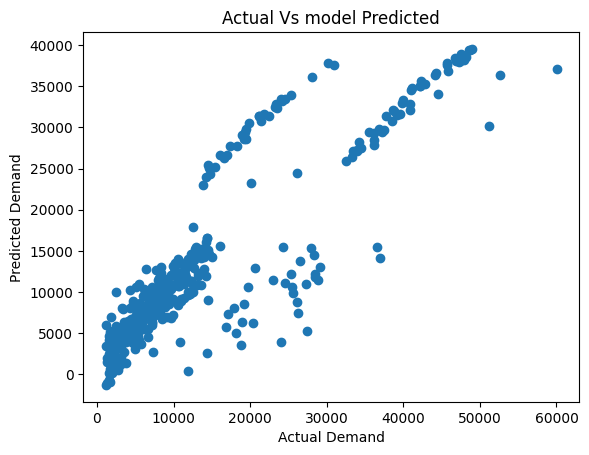

In [ ]:
# Idenntify for dependent Variable (y) and independent variables (x).

# Will assign x for dependent Variables and y for idependent Variables
x = new_medical_data.drop(columns=['charges'])

y = new_medical_data['charges']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

y_pred_train

# Predicting on test set results

y_pred = regressor.predict(x_test)

y_pred

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error for first ML model-1 is:', MSE)

print('Mean Absolute Error for first ML model-1 is:', MAE)

print('Root Mean Squared Error for first ML model-1 is:', RMSE)

print('Regression Score on train set of ML Model-1 is', r2score_train)

print('Regression Score on test set of ML Model-1 is:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

**Will understand for evalution matrix for linear regression problem**

**Regression Evaluation Metrics:**

*   Mean Squared Error (MSE):MSE calculates the average squared difference between the predicted and actual values. For ML Model 1 MSE is **38800927**
*   Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values.For ML Model 1 MAE is  **4234**
*   Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is in the same units as the target variable.For ML Model 1 MAE is **6229**
*   R squared (R^2): R squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.For ML Model 1 R squar for train set is **74.23%** and for test set is **76.30%**



#### Regularization for ML Model - 1

##### Lasso Regression and Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

print('Lasso Regression for test set of ML Model-1 is:',lasso_test)
print('Ridge Regression for test set of ML Model-1 is:',ridge_test)

0.7627575133461943
0.7629621195000943
Lasso Regression for test set of ML Model-1 is: 0.7627575133461943
Ridge Regression for test set of ML Model-1 is: 0.7629621195000943


**Lasso Regression score for test set is 76.27%. Ridge Regression score for test set is 76.29%**

#### Cross- Validation & Hyperparameter Tuning for ML Model -1

##### With Lasso Regression

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

0.7627575133461943
The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -36526142.686076865
MSE with Lasso Regression : 38868263.7513222
RMSE with Lasso Regression : 6234.441735337832
R2 with Lasso Regression : 0.7626504049302166
Adjusted R2 with Lasso Regression: 0.7590450946253591
The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -36794777.388633154
MSE with Ridge Regression : 38818835.9177977
RMSE with Ridge Regression : 6230.476379683796
R2 with Ridge Regression : 0.7629522366854831
Adjusted R2 with Ridge Regression : 0.7593515111667815


**Cross- Validation & Hyperparameter Tuning for ML Model -1**
##### With Lasso Regression:

1.   MSE with Lasso Regression : 38868263
2.   RMSE with Lasso Regression : 6234
3.   R2 with Lasso Regression : 76.26%
4.   Adjusted R2 with Lasso Regression: 75.90%
5.   The best fit alpha value is found out to be : 0.1

##### With Ridge Regression:

1.   MSE with Ridge Regression : 38818835
2.   RMSE with Ridge Regression : 6230
3.   R2 with Ridge Regression : 76.29%
4.   Adjusted R2 with Ridge Regression : 75.93%

**From the above results, we can observe that there haven't been any significant changes in evaluation metrics after applying regularization techniques and cross-validation. Therefore, we will explore another machine learning model**

### ML Model - 2

#### Using all categorical Variables for ML Model-2

In [ ]:
new_medical_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

(935, 4)
(402, 4)
(935,)
(402,)
Mean Squared Error for first ML model-2 is: 62950780.54797765
Mean Absolute Error for first ML model-2 is: 6005.216250734506
Root Mean Squared Error for first ML model-2 is: 7934.1527933345
Regression Score on train set of ML Model-2 is 0.6265255419779558
Regression Score on test set of ML Model-2 is: 0.6155901799992025


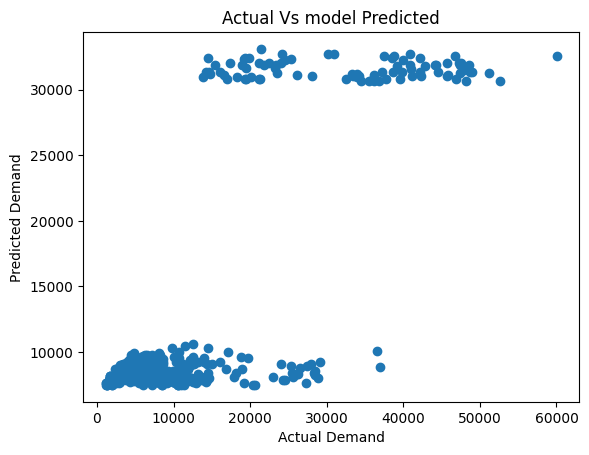

In [ ]:
# Idenntify for dependent Variable (y) and independent variables (x).

# Will assign x for dependent Variables and y for idependent Variables
x = new_medical_data[['sex','children','smoker','region']]

y = new_medical_data['charges']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

y_pred_train

# Predicting on test set results

y_pred = regressor.predict(x_test)

y_pred

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error for first ML model-2 is:', MSE)

print('Mean Absolute Error for first ML model-2 is:', MAE)

print('Root Mean Squared Error for first ML model-2 is:', RMSE)

print('Regression Score on train set of ML Model-2 is', r2score_train)

print('Regression Score on test set of ML Model-2 is:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

**Regression Evaluation Metrics for ML Model-2:**

*   Mean Squared Error (MSE):MSE calculates the average squared difference between the predicted and actual values. For ML Model 2 MSE is **62950780**
*   Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values.For ML Model 2 MAE is  **6005**
*   Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is in the same units as the target variable.For ML Model 2 MAE is **7934**
*   R squared (R^2): R squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.For ML Model 2 R squar for train set is **62.65%** and for test set is **61.55%**

#### Regularization for ML Model - 2

##### Lasso Regression and Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

print('Lasso Regression for test set of ML Model-2 is:',lasso_test)
print('Ridge Regression for test set of ML Model-2 is:',ridge_test)

0.6153845678330339
0.615549573140197
Lasso Regression for test set of ML Model-2 is: 0.6153845678330339
Ridge Regression for test set of ML Model-2 is: 0.615549573140197


**Lasso Regression score for test set is 61.53%. Ridge Regression score for test set is 61.55%**

#### Cross- Validation & Hyperparameter Tuning for ML Model -2

##### With Lasso Regression and ridge regression

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

0.6153845678330339
The best fit alpha value is found out to be : {'alpha': 40}

Using  {'alpha': 40}  the negative mean squared error is:  -52650691.44062845
MSE with Lasso Regression : 63106059.87570161
RMSE with Lasso Regression : 7943.9322678193585
R2 with Lasso Regression : 0.6146419646172706
Adjusted R2 with Lasso Regression: 0.6107592640088804
The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -53341429.33257956
MSE with Ridge Regression : 62958091.18613853
RMSE with Ridge Regression : 7934.613486877513
R2 with Ridge Regression : 0.6155455374852408
Adjusted R2 with Ridge Regression : 0.6116719408855957


**Cross- Validation & Hyperparameter Tuning for ML Model -2**
##### With Lasso Regression:

1.   MSE with Lasso Regression : 63106059
2.   RMSE with Lasso Regression : 7943
3.   R2 with Lasso Regression : 61.46%
4.   Adjusted R2 with Lasso Regression: 61.07%
5.   The best fit alpha value is found out to be : 0.1

##### With Ridge Regression:

1.   MSE with Ridge Regression : 62958091
2.   RMSE with Ridge Regression : 7934
3.   R2 with Ridge Regression : 61.55%
4.   Adjusted R2 with Ridge Regression : 61.16%

**For ML Model-2 we are not getting good evalution score as compared to ML Model 1.**

**Will plot box plot for outliers**

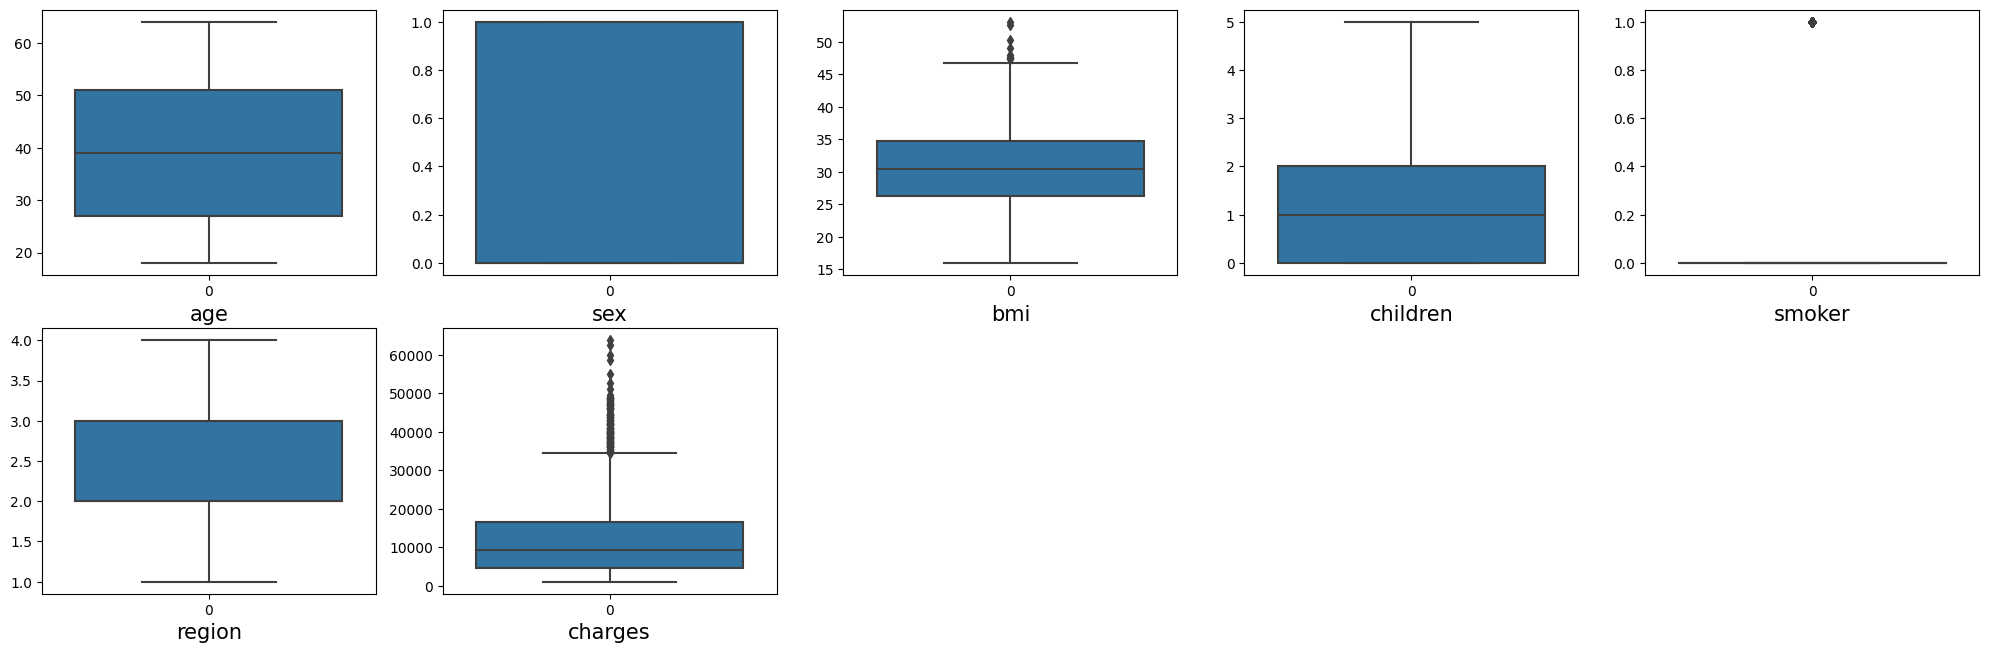

In [ ]:

plt.figure(figsize=(25,20))
graph = 1

for column in new_medical_data:
  if graph<=25:
    plt.subplot(5,5,graph)
    ax=sns.boxplot(data= new_medical_data[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [ ]:
new_medical_data.shape

(1337, 7)

In [ ]:
from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 2

# Select columns
numerical_cols = ['bmi','smoker','charges']


no_outliers = new_medical_data.copy()

for col in numerical_cols:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# checking shape of dataset
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (1178, 7)


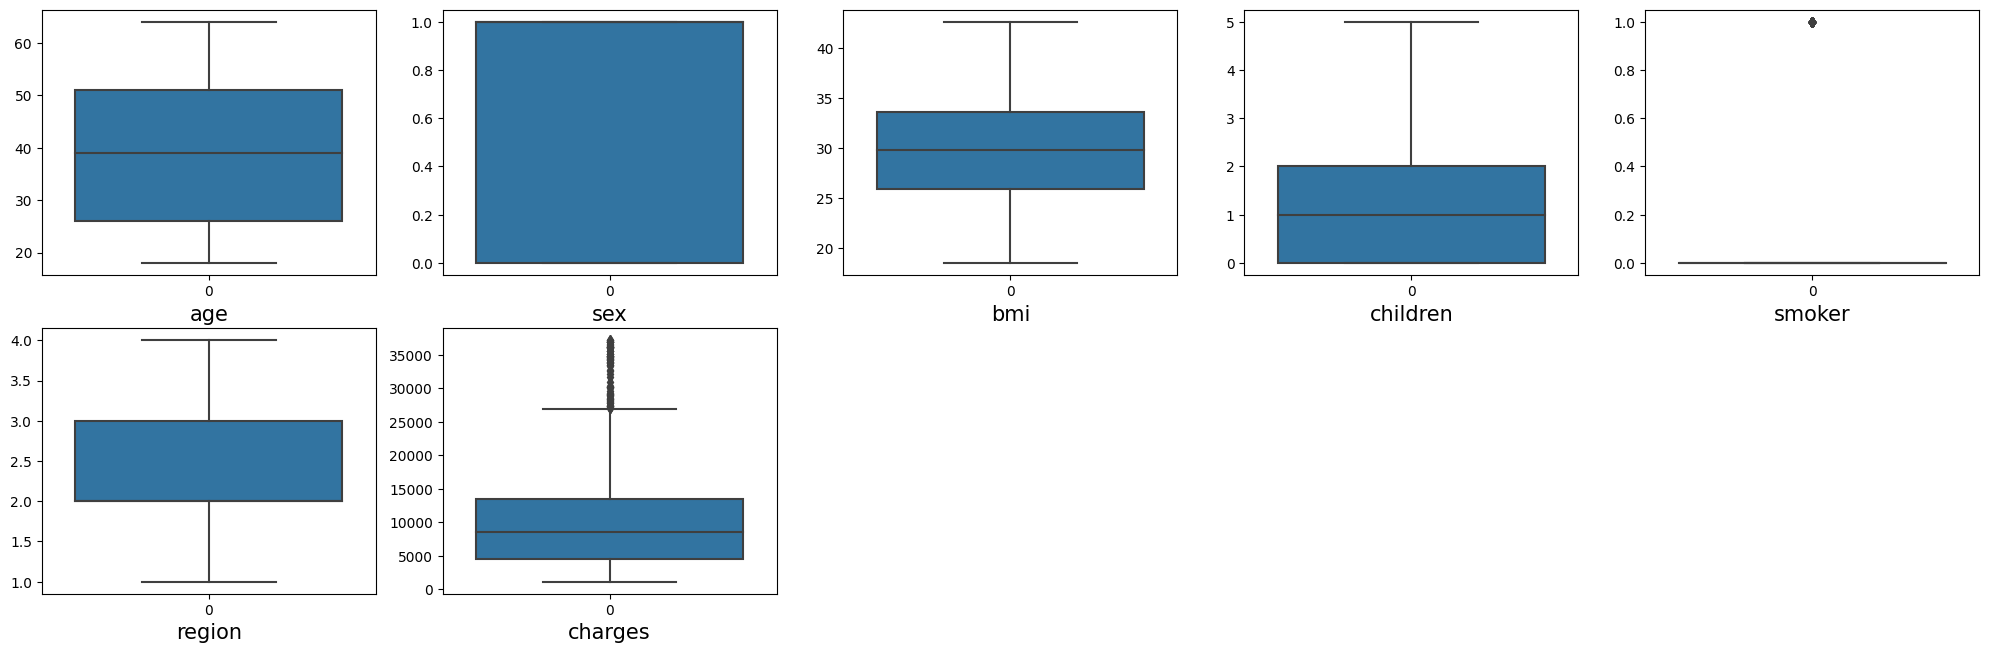

In [ ]:
plt.figure(figsize=(25,20))
graph = 1

for column in no_outliers:
  if graph<=25:
    plt.subplot(5,5,graph)
    ax=sns.boxplot(data= no_outliers[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

By using z-score threshold method we have data with no_outliers. But for 'charges' column still seems have outliers in upper side, will check for same using IQR method.

In [ ]:
# Will check for quintile data

q1 = no_outliers.quantile(0.25)

q3 = no_outliers.quantile(0.75)

q2 = no_outliers.quantile(0.50)

iqr = q3 - q1

print(q1)
print(q3)
print(q2)
print(iqr)

# Using outlier detection formula

# For Higher Side

charges_high = (q3.charges + (1.5 * iqr.charges)) # Pregnancies higher

charges_high

# Check the indexes which have higher values

np_index = np.where(no_outliers['charges'] > charges_high)
np_index

# Drop the index which we found in the above cell

no_outliers = no_outliers.drop(no_outliers.index[np_index])

no_outliers.shape

age           26.000000
sex            0.000000
bmi           25.935000
children       0.000000
smoker         0.000000
region         2.000000
charges     4464.059175
Name: 0.25, dtype: float64
age            51.0000
sex             1.0000
bmi            33.6600
children        2.0000
smoker          0.0000
region          3.0000
charges     13470.8461
Name: 0.75, dtype: float64
age           39.00000
sex            1.00000
bmi           29.81000
children       1.00000
smoker         0.00000
region         2.00000
charges     8569.60465
Name: 0.5, dtype: float64
age           25.000000
sex            1.000000
bmi            7.725000
children       2.000000
smoker         0.000000
region         1.000000
charges     9006.786925
dtype: float64


(1104, 7)

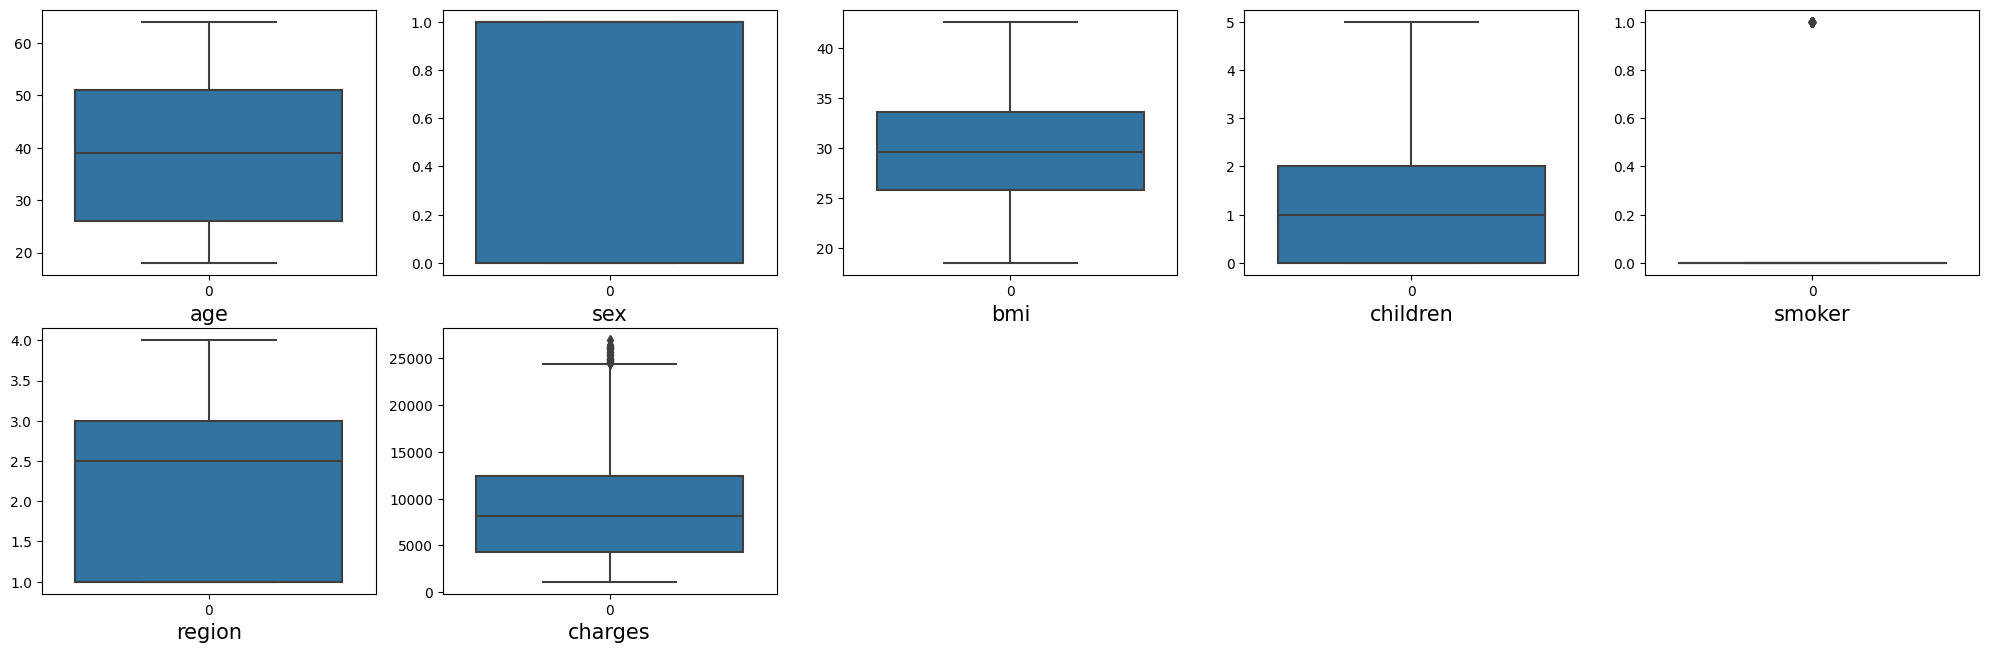

In [ ]:
plt.figure(figsize=(25,20))
graph = 1

for column in no_outliers:
  if graph<=25:
    plt.subplot(5,5,graph)
    ax=sns.boxplot(data= no_outliers[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

Now we have more clean data with respect to outliers.

### ML Model - 3

#### After Treatment of outliers

(772, 6)
(332, 6)
(772,)
(332,)
Mean Squared Error for first ML model-3 is: 14255559.82772053
Mean Absolute Error for first ML model-3 is: 1997.002286814351
Root Mean Squared Error for first ML model-3 is: 3775.653562990192
Regression Score on train set of ML Model-3 is 0.6575678179201336
Regression Score on test set of ML Model-3 is: 0.6151058214769338


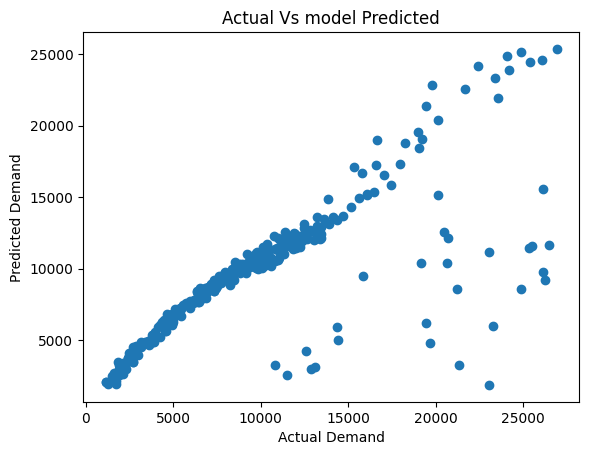

In [ ]:
# Will assign x for dependent Variables and y for idependent Variables
x = no_outliers.drop(columns=['charges'])

y = no_outliers['charges']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

y_pred_train

# Predicting on test set results

y_pred = regressor.predict(x_test)

y_pred

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error for first ML model-3 is:', MSE)

print('Mean Absolute Error for first ML model-3 is:', MAE)

print('Root Mean Squared Error for first ML model-3 is:', RMSE)

print('Regression Score on train set of ML Model-3 is', r2score_train)

print('Regression Score on test set of ML Model-3 is:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

#### Regularization for ML Model - 3

##### Lasso Regression and Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

print('Lasso Regression for test set of ML Model-3 is:',lasso_test)
print('Ridge Regression for test set of ML Model-3 is:',ridge_test)

0.615184933632859
0.6150804009967739
Lasso Regression for test set of ML Model-3 is: 0.615184933632859
Ridge Regression for test set of ML Model-3 is: 0.6150804009967739


**Lasso Regression score for test set is 61.51%. Ridge Regression score for test set is 61.50%**

#### Cross- Validation & Hyperparameter Tuning for ML Model -3

##### With Lasso Regression and ridge regression

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

0.615184933632859
The best fit alpha value is found out to be : {'alpha': 0.6}

Using  {'alpha': 0.6}  the negative mean squared error is:  -13110011.89974212
MSE with Lasso Regression : 14254597.332982028
RMSE with Lasso Regression : 3775.5261001590266
R2 with Lasso Regression : 0.6151318084340358
Adjusted R2 with Lasso Regression: 0.608026549512818
The best fit alpha value is found out to be : {'alpha': 0.3}

Using  {'alpha': 0.3}  the negative mean squared error is:  -13087194.503425568
MSE with Ridge Regression : 14258989.685371565
RMSE with Ridge Regression : 3776.1077428182007
R2 with Ridge Regression : 0.6150132167487437
Adjusted R2 with Ridge Regression : 0.6079057684425666


**Cross- Validation & Hyperparameter Tuning for ML Model -3**
##### With Lasso Regression:

1.   MSE with Lasso Regression : 14254597
2.   RMSE with Lasso Regression : 3775
3.   R2 with Lasso Regression : 61.51%
4.   Adjusted R2 with Lasso Regression: 60.80%
5.   The best fit alpha value is found out to be : 0.3

##### With Ridge Regression:

1.   MSE with Ridge Regression : 14258989
2.   RMSE with Ridge Regression : 3776
3.   R2 with Ridge Regression : 61.50%
4.   Adjusted R2 with Ridge Regression : 60.79%

### ML Model - 4

#### Decision Tree

(772, 6)
(332, 6)
(772,)
(332,)
Mean Squared Error decision tree model: 34410321.63938603
Mean Absolute Error decision tree model: 2694.6623572891567
Root Mean Squared Error decision tree model: 5866.031165906471
Regression Score on train set of decision tree model 0.9973141924438218
Regression Score on test set of decision tree model: 0.07093564615036618


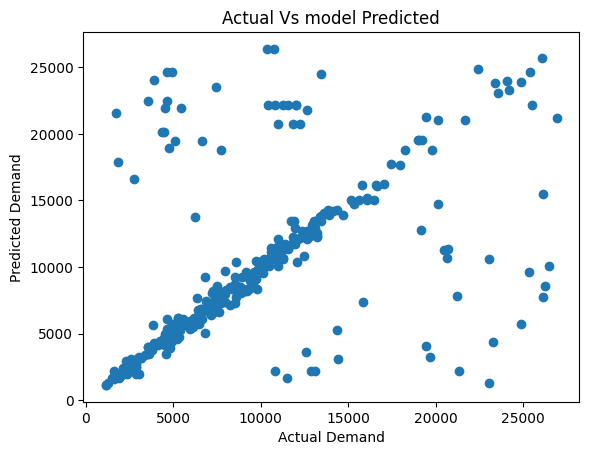

0.615184933632859
0.6150804009967739
Lasso Regression for test set of ML Model-1 is: 0.615184933632859
Ridge Regression for test set of ML Model-1 is: 0.6150804009967739


In [ ]:
# Will assign x for dependent Variables and y for idependent Variables
x = no_outliers.drop(columns=['charges'])

y = no_outliers['charges']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# import library and Fit a Decision Tree model

from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

# Make predictions on the training data
y_pred_train = decision_tree.predict(x_train)

# Make predictions on the test data
y_pred = decision_tree.predict(x_test)


MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error decision tree model:', MSE)

print('Mean Absolute Error decision tree model:', MAE)

print('Root Mean Squared Error decision tree model:', RMSE)

print('Regression Score on train set of decision tree model', r2score_train)

print('Regression Score on test set of decision tree model:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

print('Lasso Regression for test set of decision tree model is:',lasso_test)
print('Ridge Regression for test set of decision tree model is:',ridge_test)

**By observing above results, seems model overfitting on train dataset and underfiting for test dataset.**

**Lasso Regression score for test set is 61.51%. Ridge Regression score for test set is 61.50%**

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters,cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters,cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

0.615184933632859
The best fit alpha value is found out to be : {'alpha': 0.6}

Using  {'alpha': 0.6}  the negative mean squared error is:  0.6584468187670552
MSE with Lasso Regression : 14254597.332982028
RMSE with Lasso Regression : 3775.5261001590266
R2 with Lasso Regression : 0.6151318084340358
Adjusted R2 with Lasso Regression: 0.608026549512818
The best fit alpha value is found out to be : {'alpha': 0.2}

Using  {'alpha': 0.2}  the negative mean squared error is:  0.6522433618438563
MSE with Ridge Regression : 14257742.806876415
RMSE with Ridge Regression : 3775.9426381867106
R2 with Ridge Regression : 0.6150468819488415
Adjusted R2 with Ridge Regression : 0.6079400551540508


### ML Model - 5

#### kNN Model

(772, 6)
(332, 6)
(772,)
(332,)
Mean Squared Error kNN model: 17987453.434924953
Mean Absolute Error kNN model: 2317.9192040355424
Root Mean Squared Error kNN model: 4241.161802492915
Regression Score on train set of kNN model 0.9973141924438218
Regression Score on test set of kNN model: 0.5143462482550307


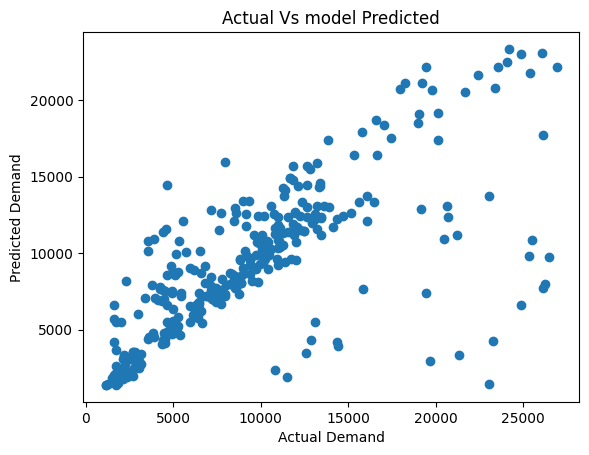

0.615184933632859
The best fit alpha value is found out to be : {'alpha': 0.6}

Using  {'alpha': 0.6}  the negative mean squared error is:  0.6584468187670552
MSE with Lasso Regression : 14254597.332982028
RMSE with Lasso Regression : 3775.5261001590266
R2 with Lasso Regression : 0.6151318084340358
Adjusted R2 with Lasso Regression: 0.608026549512818
The best fit alpha value is found out to be : {'alpha': 0.2}

Using  {'alpha': 0.2}  the negative mean squared error is:  0.6522433618438563
MSE with Ridge Regression : 14257742.806876415
RMSE with Ridge Regression : 3775.9426381867106
R2 with Ridge Regression : 0.6150468819488415
Adjusted R2 with Ridge Regression : 0.6079400551540508


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

x = no_outliers.drop(columns=['charges'])

y = no_outliers['charges']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting for a kNN Model

knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_regressor.fit(x_train, y_train)

# Make predictions on the training data
y_pred = knn_regressor.predict(x_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(x_test)


MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error kNN model:', MSE)

print('Mean Absolute Error kNN model:', MAE)

print('Root Mean Squared Error kNN model:', RMSE)

print('Regression Score on train set of kNN model', r2score_train)

print('Regression Score on test set of kNN model:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()


# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters,cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters,cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

**For kNN model its also seems like model is overfiting for train data.**

### ML Model - 6

#### Support Vector Regression

(772, 6)
(332, 6)
(772,)
(332,)
Mean Squared Error for Support Vector Regression: 38141100.92493862
Mean Absolute Error for Support Vector Regression: 4672.256444135131
Root Mean Squared Error for Support Vector Regression: 6175.848194777671
Regression Score on train set for Support Vector Regression 0.9973141924438218
Regression Score on test set for Support Vector Regression: -0.02979384085100456


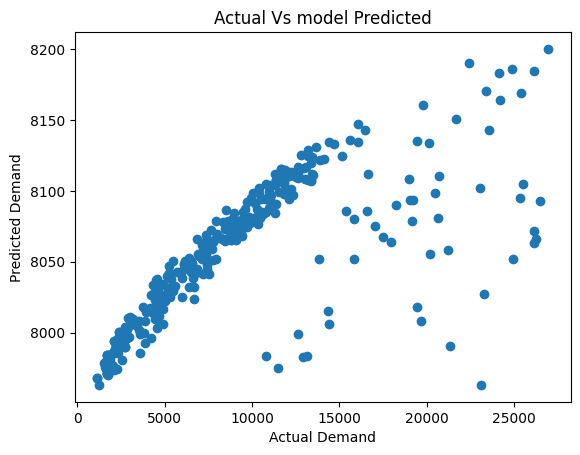

0.615184933632859
The best fit alpha value is found out to be : {'alpha': 0.6}

Using  {'alpha': 0.6}  the negative mean squared error is:  0.6584468187670552
MSE with Lasso Regression : 14254597.332982028
RMSE with Lasso Regression : 3775.5261001590266
R2 with Lasso Regression : 0.6151318084340358
Adjusted R2 with Lasso Regression: 0.608026549512818
The best fit alpha value is found out to be : {'alpha': 0.2}

Using  {'alpha': 0.2}  the negative mean squared error is:  0.6522433618438563
MSE with Ridge Regression : 14257742.806876415
RMSE with Ridge Regression : 3775.9426381867106
R2 with Ridge Regression : 0.6150468819488415
Adjusted R2 with Ridge Regression : 0.6079400551540508


In [ ]:
from sklearn.svm import SVR

x = no_outliers.drop(columns=['charges'])

y = no_outliers['charges']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting for a kNN Model

svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

# Make predictions on the training data
y_pred = svr.predict(x_train)

# Make predictions on the test data
y_pred = svr.predict(x_test)


MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)


print('Mean Squared Error for Support Vector Regression:', MSE)

print('Mean Absolute Error for Support Vector Regression:', MAE)

print('Root Mean Squared Error for Support Vector Regression:', RMSE)

print('Regression Score on train set for Support Vector Regression', r2score_train)

print('Regression Score on test set for Support Vector Regression:', r2score_test)

# Plot for Actual Vs model Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual Vs model Predicted')
plt.show()

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters,cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

# For ridge Regression

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters,cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

# **Conclusion**



*   Age_Group wise count of insured graph indicates that 'Adult' age group is having maximum count follwed by 'Seniou Citizen' and Teenager.

*   Sex wise childern count graph,"female" category typically has a higher count of children compared to the "male" category.This graph indicate how many families have no children, how many have one child, and how many have larger families with multiple children.

*   For Sex wise smoker count, total number of smokers in your dataset by summing up the smoker sections in both the "male" and "female" categories.Above chart indicate that Count of 'female' with 'no' smoker is highest followd by 'male' with 'no' smoker.'Male' smoker are more than 'Female'
*   Region-wise count graph indicates that the highest bar is in the 'Southeast' region, and it has 364 (27.2%) insured individuals.The lowest bar is in the 'Northwest' and 'northest' region, and it has 324 (24.2) insured individuals.
*   For Region-wise Sex count, In 'southeast' we have maximum count of 'male',while in 'northwest we have minimum count of 'male'.Similarly, 'southeast' we have maximum count of 'female',while in 'northeast we have minimum count of 'female'.


*   In BMI-group count, We have highest population in 'Overweight' BMI group while lowest population on 'Underwight'.Most of insured population fall under overweight that means insurds BMI is not good, ideally we should have most of count for HealthyBMI.

*   In Average BMI for Age_group,we have highest average BMI is 31.64 for 'Senior citizen'.

*   From Charges Distribution chart, average charges distributed around Rs.13279.The majority of charges appear to be concentrated around the mean value.
*   From Charges distribution for sex and smoker,Smokers (Yes) have significantly higher average charges for medical insurance compared to non-smokers (No). This suggests that smoking is associated with higher medical costs.The plot indicates that, on average, men (Male) tend to have slightly higher medical insurance charges than women (Female).


*   From table of Average Medical Insurance Charges by Gender and smoker,we can observe that the average charges for female smokers amount to Rs. 30,678, while for males, it is Rs. 33,042. Conversely, for non-smoking females, the average charges are Rs. 8,762, and for non-smoking males, they amount to Rs. 8,099.


*   From table of Average Medical Insurance Charges by Gender and Number of Children,For both females and males, as the number of children increases, the average charges for medical insurance generally tend to increase. This is expected, as having more children may lead to higher healthcare expenses.



*   From pair plot We can observe that relation and distribution of each varibale, we have have positive correlation for 'bmi' and 'charges', 'age' and 'charges','children' and 'charges'.



# **Among the six ML models, Model No. 1, which is the linear regression model, achieved the best MSE, MAE, RMSE, and R2 scores. All other models performed less favorably compared to the linear regression model.**